# Практика №3. Динамическое программирование

В качестве практики предлагается решить пять задач по динамическому программированию.

## Задача 1

Дано N предметов массой m1, …, mN и стоимостью c1, …, cN соответственно.

Ими наполняют рюкзак, который выдерживает вес не более M. Какую наибольшую стоимость могут иметь предметы в рюкзаке?

Входные данные:

В первой строке вводится натуральное число N, не превышающее 100, и натуральное число M, не превышающее 10000.

Во второй строке вводится N натуральных чисел mi, не превышающих 100.

Во третьей строке вводится N натуральных чисел сi, не превышающих 100.

Выходные данные:

Выведите одно целое число: наибольшую возможную стоимость рюкзака.



## Решение
Эта задача является частным случаем задачи об укладке рюкзака, которая в общем случае формулируется, как:

Дано n предметов, i-й предмет имеет массу weighti > 0 и стоимость costi > 0. Необходимо выбрать из этих предметов такой набор, чтобы суммарная масса не превосходила заданной величины M (вместимость рюкзака), а суммарная стоимость была максимальна. Другими словами, нужно определить набор бинарных величин (b1, b2,..., bn), при котором выполняется соотношение:

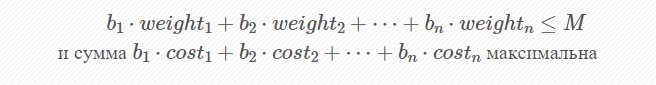

Введем функцию A. 

A(n, m) - максимальная стоимость предметов, которые можно уложить в рюкзак максимальной вместимости m, если можно использовать только первые n предметов из заданных N.
Зададим краевые значения для A(n, m)
Если ни один предмет брать нельзя, т.е. n = 0, то A(0, m) = 0, для любого m.
Если вместимость рюкзака равна 0, т.е. m = 0 , то A(n, 0) = 0, для любого n.

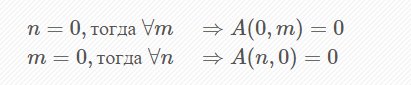

Теперь составим рекуррентное соотношение. Необходимо из предметов с номерами 1, ..., n составить рюкзак максимальной стоимости, чей вес не превышает m. При этом возможно два случая: когда в максимальный рюкзак включен предмет с номером n и когда предмет n не попал в максимальный рюкзак.

Если предмет n не попал в максимальный рюкзак массы m, то максимальный рюкзак будет составлен только из предметов с номерами 1, ..., n - 1, следовательно, A(n, m) = A(n - 1, m).

Если же в максимальный рюкзак включен предмет n, то масса оставшихся предметов не превышает m - weightn, а от добавления предмета n общая стоимость рюкзака увеличивается на costn. Значит, A(n, m) = A(n - 1, m - weightn) + costn. Теперь из двух возможных вариантов составить рюкзак массы, не превосходящей m, из предметов 1, ..., n нужно выбрать наилучший, т.е.

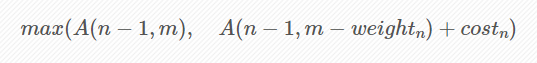

В программе веса предметов считаем в список weight, а стоимости в список cost. Т.к. принято индексировать массивы начиная с индекса 0, то чтобы у нас weight[1] и cost[1] соответствовали предмету с номером 1, то после считывания добавим фиктивный предмет с весом 0 и стоимостью 0. Значения функции A(n,m) будем хранить в списке A[n][m]. Ответ на задачу будет находится в элементе A[N][M].

In [1]:
def task_1(N, M, weight, cost):
    weight.insert(0, 0)
    cost.insert(0, 0)
    for i in range(N+1):
        A.append([0]*(M+1))

    for n in range(1, N+1):
        for m in range(M+1):
            A[n][m] = A[n-1][m]
            if (m >= weight[n] and A[n-1][m-weight[n]] + cost[n] > A[n][m]):
                A[n][m] =  A[n-1][m-weight[n]] + cost[n]

    print(A[N][M])

In [2]:
N, M = map(int, input().split()) # N - количество предметов
                                           # M - предельная масса
weight = [int(i) for i in input().split()] # веса
cost = [int(i) for i in input().split()]   # стоимости
A = []
task_1(N, M, weight, cost)

13


In [3]:
task_1(N=4, M=6, weight=[2, 4, 1, 2], cost=[7, 2, 5, 1])

13


## Задача 2

Дан набор гирь массой m1, …, mN. Можно ли их разложить на две чаши весов, чтобы они оказались в равновесии?

Входные данные:

В первой строке вводится натуральное число N, не превышающее 100.

Во второе строке вводится N натуральных чисел mi, не превышающих 100.

Выходные данные:

Выведите True или False.

## Решение

Задача на самом деле достаточно простая.
В условии сказано, что используются натуральные числа. Благодаря этому мы можем сразу отсеить все варнианты, когда сумма гирь нечётная-с помощью них разложить гири не получится.

Затем вичислим целевой вес и создадим массив, в котором будем хранить воззможность разложения гирь к этому весу.

In [4]:
def task_2(N, weights):
    total_weight = sum(weights)

    if total_weight % 2 != 0:
        return False

    target_weight = total_weight // 2
    dp = [[False] * (target_weight + 1) for _ in range(N + 1)]

    for i in range(N):
        dp[i][0] = True

    for i in range(1, N + 1):
        for j in range(1, target_weight + 1):
            if j < weights[i - 1]:
                dp[i][j] = dp[i - 1][j]
            else:
                dp[i][j] = dp[i - 1][j] or dp[i - 1][j - weights[i - 1]]

    print(dp[N][target_weight])


In [5]:
N = int(input())
weights = [int(i) for i in input().split()]

task_2(N, weights)

True


In [6]:
task_2(N=4, weights=[4, 2, 6, 8])

True


## Задача 3

В некотором государстве в обращении находятся банкноты определенных номиналов. Национальный банк хочет, чтобы банкомат выдавал любую запрошенную сумму при помощи минимального числа банкнот, считая, что запас банкнот каждого номинала неограничен. Помогите национальному банку решить эту задачу.

Входные данные:

Первая строка входных данных содержит натуральное число N, не превосходящее 100 — количество номиналов банкнот в обращении. Вторая строка входных данных содержит N различных натуральных чисел x1, x2, ..., xN, не превосходящих 10^6 — номиналы банкнот. Третья строчка содержит натуральное число S, не превосходящее 10^6 — сумму, которую необходимо выдать.

Выходные данные:

Программа должна определить представление числа S как сумму элементов из множества xi таким образом, чтобы количество элементов в сумме было минимальным. Затем она должна отобразить это представление, выведя на экран последовательность элементов, разделенных пробелами. В случае наличия нескольких подходящих представлений, программа может вывести любое из них. Если же найти такое представление невозможно, программа должна сообщить об этом, выведя сообщение «No solution».

## Решение

1. Функция task_3(N, denominations, S) принимает количество номиналов N, список номиналов банкнот denominations и сумму S, которую необходимо выдать.
2. Создается массив dp длиной (S + 1), в котором каждому индексу соответствует количество банкнот, необходимых для получения этой суммы.
3. Инициализируется значение 0 в ячейке dp[0], так как для получения суммы 0 банкнот не требуется.
4. Далее проходим по суммам от 1 до S и для каждой суммы проверяем, можно ли получить эту сумму с использованием одного из номиналов. Если количество банкнот уменьшается, то сохраняем новое минимальное количество.
5. После обновления массива dp, если значение в dp[S] осталось float('inf'), то это означает, что невозможно выдать сумму S данной комбинацией банкнот.
6. В случае успеха создается пустой список result для хранения номиналов банкнот.
7. Производится обратный проход по массиву dp для восстановления использованных номиналов.
8. Помещаем в список result номинал, который позволил получить данную сумму, и вычитаем его из текущей суммы. Повторяем этот процесс пока не получим исходную сумму S.
9. Возвращаем список result, представляющий минимальное количество банкнот для получения суммы S.

In [7]:
def task_3(N, denominations, S):
    dp = [float('inf')] * (S + 1)
    dp[0] = 0

    for i in range(1, S + 1):
        for denom in denominations:
            if i - denom >= 0 and dp[i - denom] + 1 < dp[i]:
                dp[i] = dp[i - denom] + 1

    result = []
    if dp[S] == float('inf'):
        print("No solution")

    current_sum = S
    while current_sum > 0:
        for denom in denominations:
            if current_sum - denom >= 0 and dp[current_sum - denom] + 1 == dp[current_sum]:
                result.append(denom)
                current_sum -= denom
                break

    print(result)

In [8]:
N = int(input())
denominations = list(map(int, input().split()))
S = int(input())

task_3(N, denominations, S)

[1, 3, 5, 5, 5, 5, 5]


In [9]:
task_3(N=3, denominations=[1, 3, 5], S=29)

[1, 3, 5, 5, 5, 5, 5]


## Задача 4

Дано N предметов массой m1, …, mN. Ими наполняют рюкзак, который выдерживает вес не более M. Как набрать вес в точности M, используя как можно меньше предметов?

Входные данные:

Первая строка входных данных содержит натуральное число N, не превышающее 100, и натуральное число M, не превышающее 10000.

Во второй строке находится N натуральных чисел mi, не превышающих 100.

Выходные данные:

Выведите наименьшее необходимое число предметов или 0, если набрать данный вес невозможно.

## Решение

1. Функция task_4(N, M, weights) принимает количество предметов N, вместимость рюкзака M и массив весов предметов weights.
2. Создается массив dp размером (M+1), где каждый элемент dp[i] будет содержать минимальное количество предметов для набора веса i.
3. Инициализируется весь массив dp значением float('inf'), кроме нулевого элемента, который соответствует нулевому весу и равен 0 предметов.
4. Далее итерируемся по всем возможным весам от 1 до M и для каждого веса проверяем все предметы. Если вес текущего предмета меньше или равен текущему весу, то пересчитываем минимальное количество предметов для текущего веса как минимум между текущим значением и (для веса, уменьшенного на вес предмета + 1).
5. После прохода по всем предметам и весам получаем массив dp, в котором dp[M] содержит минимальное количество предметов для набора веса M.
6. Если dp[M] осталось float('inf'), это означает, что набрать вес M невозможно, и возвращаем 0.
7. Иначе возвращаем значение dp[M], которое будет минимальным количеством предметов для набора веса M.

In [10]:
def task_4(N, M, weights):
    dp = [float('inf')] * (M + 1)
    dp[0] = 0

    for i in range(1, M + 1):
        for weight in weights:
            if i - weight >= 0:
                dp[i] = min(dp[i], dp[i - weight] + 1)

    if dp[M] == float('inf'):
        print(0)
    else:
        print(dp[M])

In [11]:
N, M = map(int, input().split())
weights = list(map(int, input().split()))

task_4(N, M, weights)

2


In [12]:
task_4(N=5, M=11, weights=[1, 3, 5, 6, 7])

2


## Задача 5

Дана прямоугольная доска N × M (N строк и M столбцов). В левом верхнем углу находится шахматный конь, которого необходимо переместить в правый нижний угол доски. При этом конь может ходить только на две клетки вниз и на одну клетку вправо, либо на две клетки вправо и на одну клетку вниз (рисунок для случая 3х3).

Необходимо определить, сколько существует различных маршрутов, ведущих из левого верхнего в правый нижний угол.

Входные данные:

В первой строке входного файла находится два натуральных числа N и M (1 ≤ N, M ≤ 50).

Выходные данные:

Вывести единственное число — количество способов добраться конем до правого нижнего угла доски.



## Решение

Пусть dp[i][j] содержит количество способов, которыми можно добраться из левого верхнего угла – клетки с координатами (1, 1) в правый нижний угол – клетку с координатами (n, m). Изначально обнулим массив dp и положим dp[1][1] = 1.

Согласно ходам коня в клетку (i, j) можно попасть либо из (i – 1, j – 2), либо из (i – 2, j – 1). Следовательно

dp[i][j] = dp[i – 1][j – 2] + dp[i – 2][j – 1]

In [13]:
def task_5(N, M):
    a = []
    for i in range(N):
        a.append([0] * M)
    a[0][0] = 1
    for i in range(1, N):
        for j in range(1, M):
            if i - 2 >= 0 and j - 1 >= 0:
                a[i][j] += a[i - 2][j - 1]
            if i - 1 >= 0 and j - 2 >= 0:
                a[i][j] += a[i - 1][j - 2]
    print(a[N - 1][M - 1])

In [14]:
N, M = map(int, input().split())
task_5(N, M)

1


In [15]:
task_5(N=3, M=2)

1
